# MABSim and SMPyBandits

## First Example

In this notebook, we present a first example of the use of *SMPyBandits* and *MABSim* as the base library for MAB implementartion.

In [1]:
#Dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Arms
from mabarms import ExtendedBernoulli

#Policies
from SMPyBandits.Policies import UCBalpha
from mabalgs import SafeEpsilonGreedy, SafeUCBalpha

#Simulation
from mabsim import mabs

Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...


In [17]:
plt.rcParams['figure.figsize'] = (10, 5)

#MAB parameters
#means = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.45, 0.55, 0.6])
means = np.concatenate((np.repeat(0.1, 15), np.repeat(0.7, 5), [0.9]))
k = len(means)
maxr = +1.0
minr = -1.0
ampl = maxr - minr

#arms objects
A = [ExtendedBernoulli(m, maxr=maxr, minr=minr) for m in means]

#algorithm
g = UCBalpha(k, alpha=1.0*ampl)  #alpha is related to the amplitude of rewards

#time-horizon
tau = 3000

#repetitions
n = 1

#window average parameter
win = tau//10

M = mabs(A, g, tau, repetitions=n, window=win)
M.run(tqdm_leave=True)

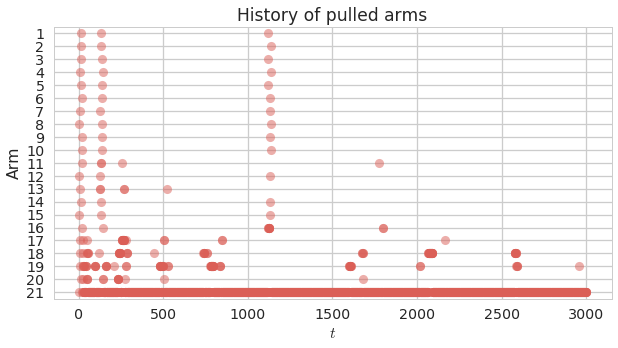

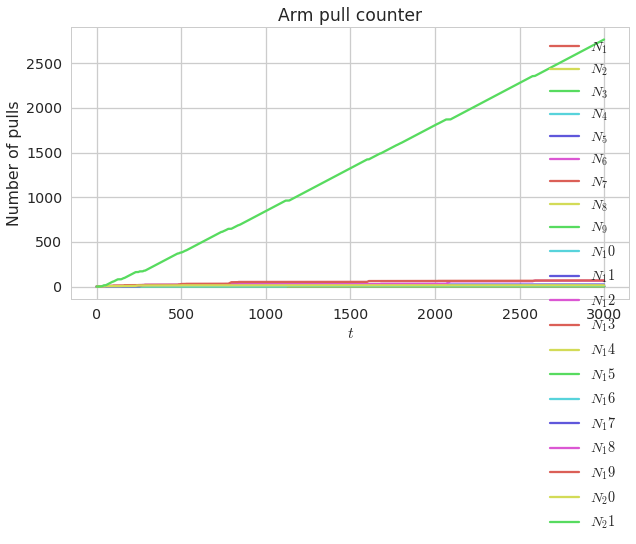

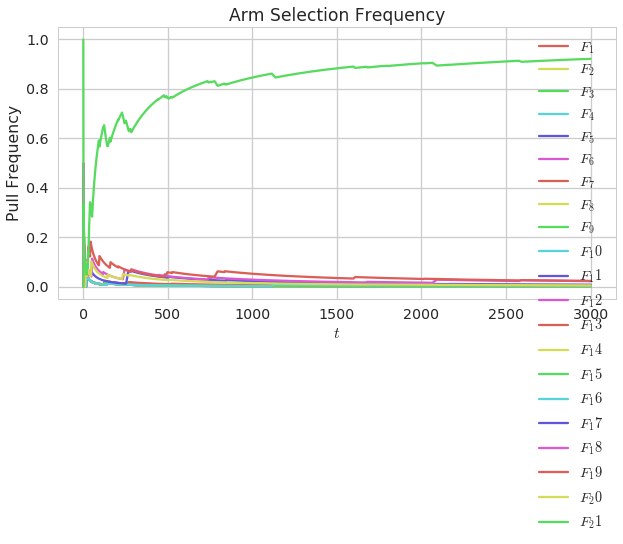

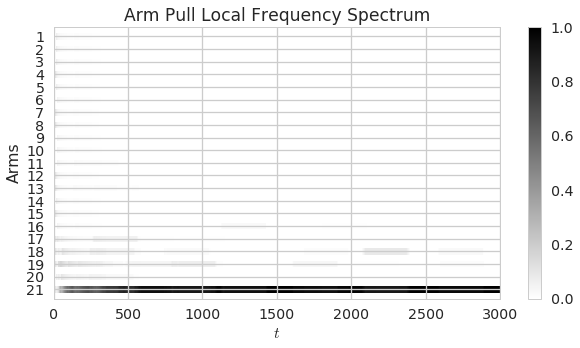

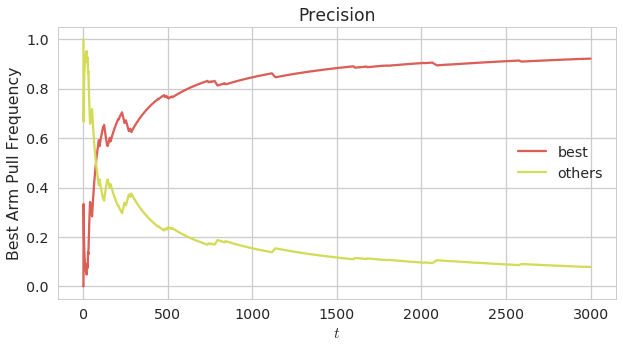

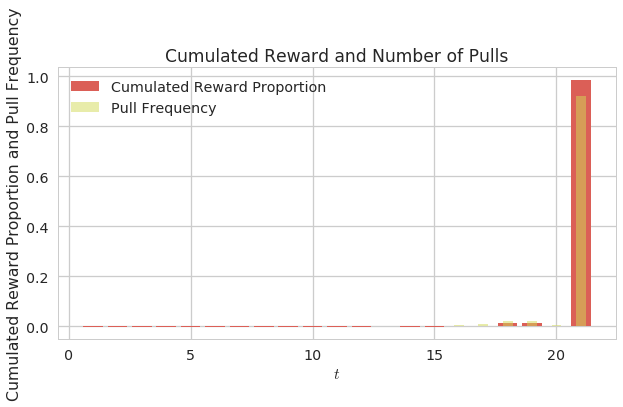

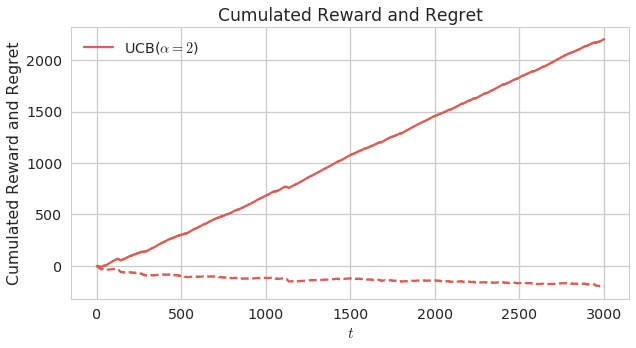

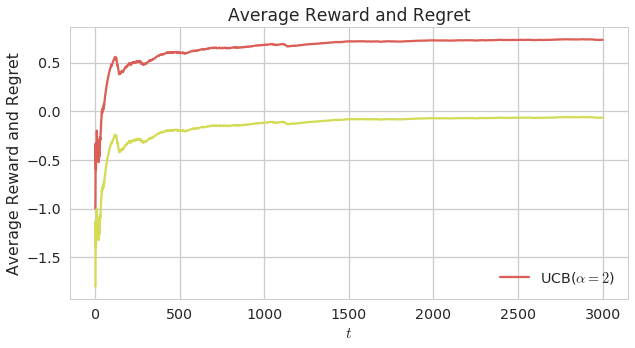

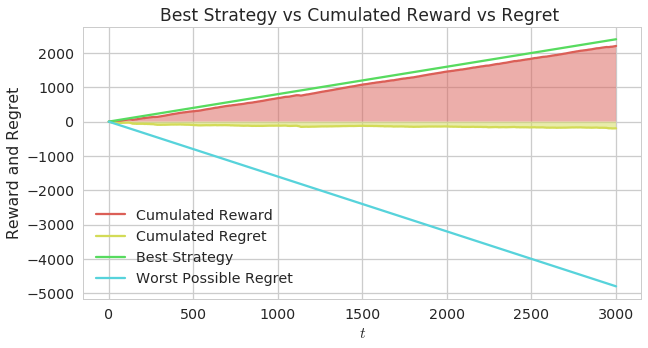

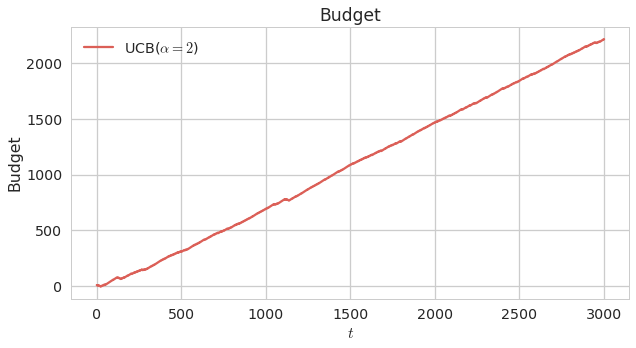

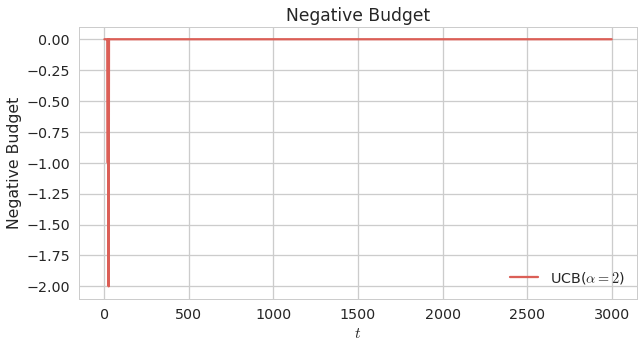

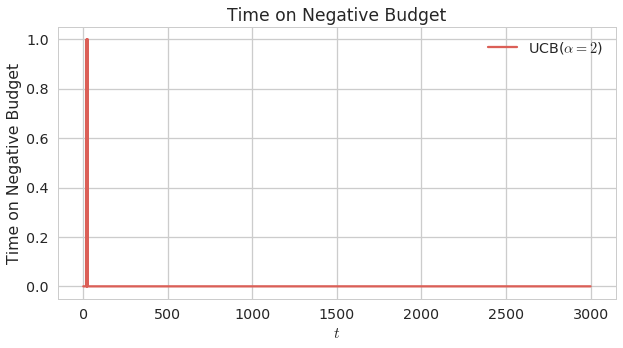

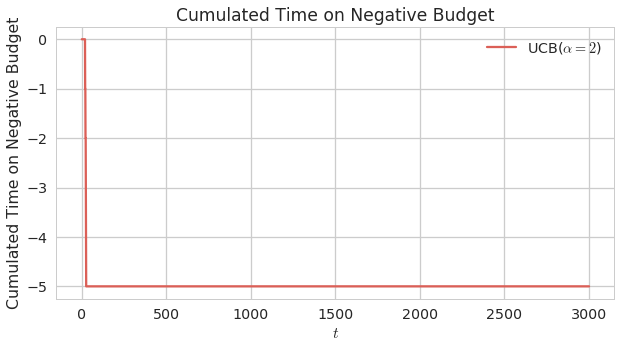

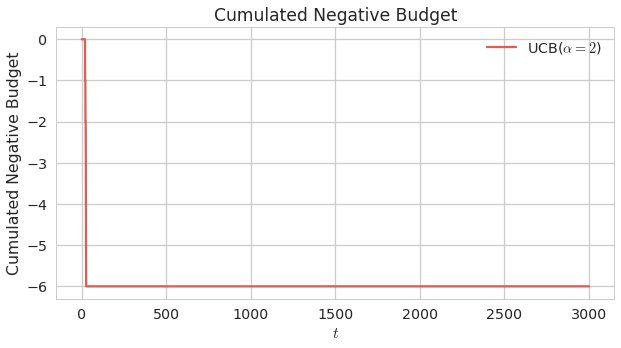

In [18]:
def plotmab(M):

    M.plot_history()

    M.plot_action_count_progression()
    M.plot_action_freq_progression()
    M.plot_action_window_freq_spectrum()
    M.plot_precision_progression()

    #M.plot_comp_arm_count()
    #M.plot_comp_arm_rewards()
    M.plot_comp_freq_prop()

    M.plot_cumulated_reward_regret_progression()
    M.plot_average_reward_regret_progression()

    #M.plot_cumulated_reward_progression()
    #M.plot_average_reward_progression()
    #M.plot_cumulated_regret_progression()
    #M.plot_average_regret_progression()
    M.plot_reward_regret()

    M.plot_budget_progression(inibudget=10.0)
    M.plot_negative_budget_progression(inibudget=10.0)
    M.plot_negative_budget_time(inibudget=10.0)
    M.plot_negative_budget_time_progression(inibudget=10.0)
    M.plot_cumulated_negative_budget_progression(inibudget=10.0)
    
plotmab(M)

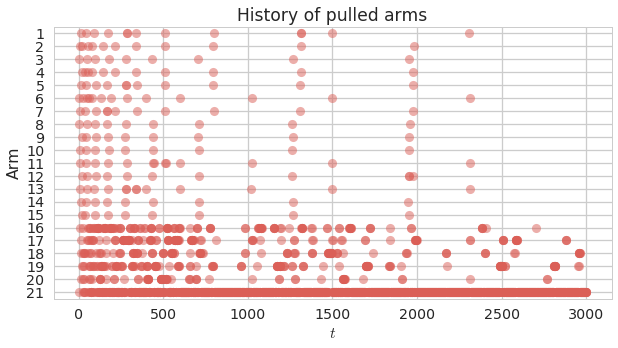

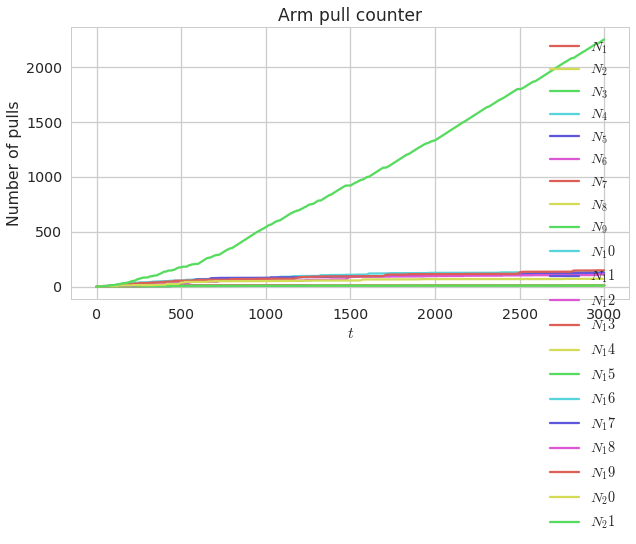

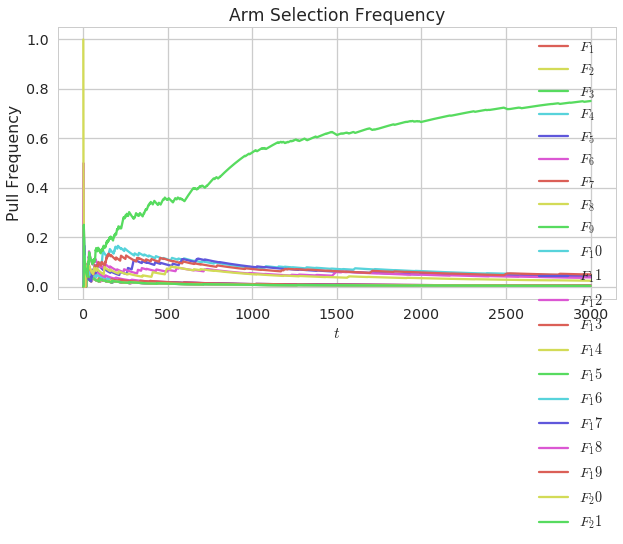

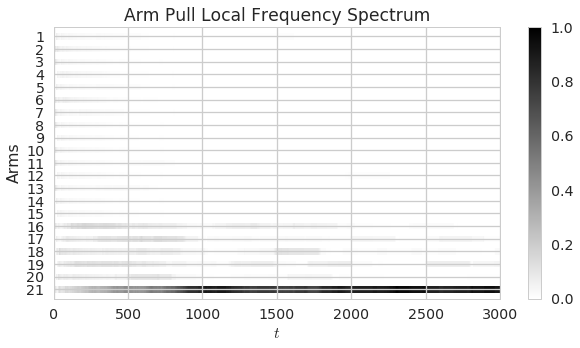

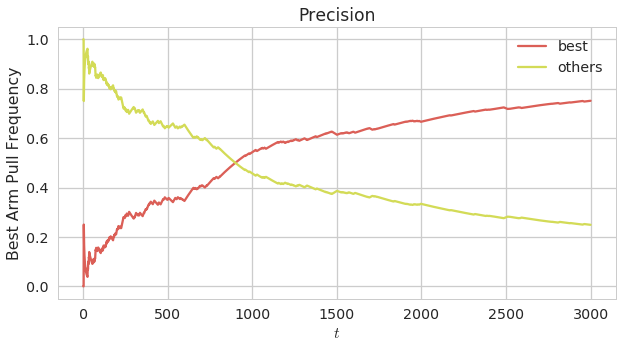

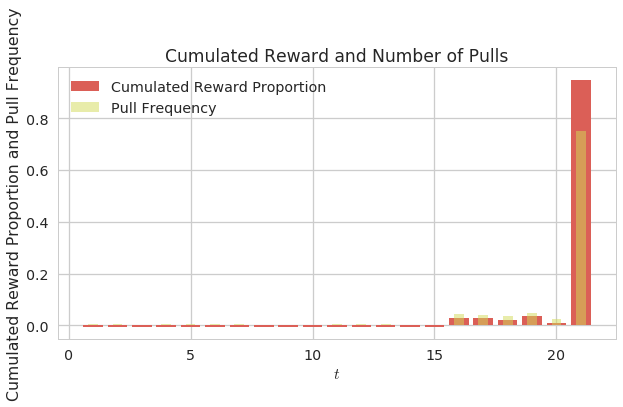

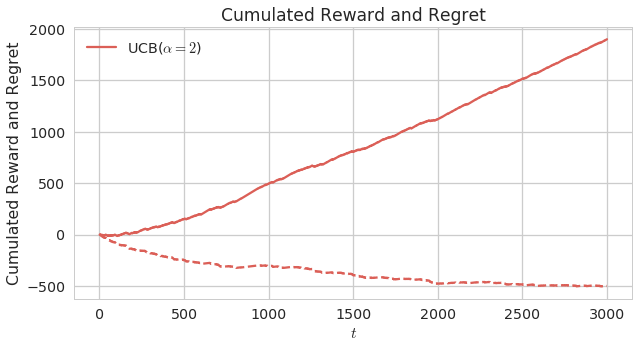

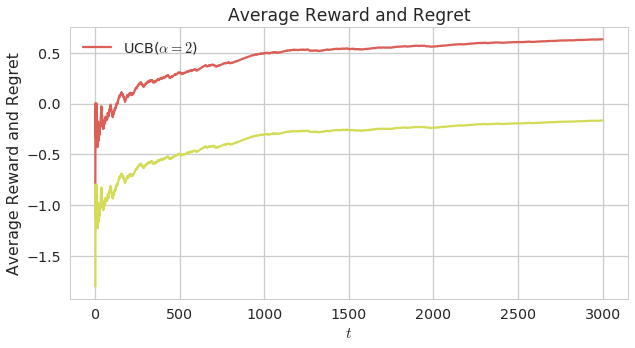

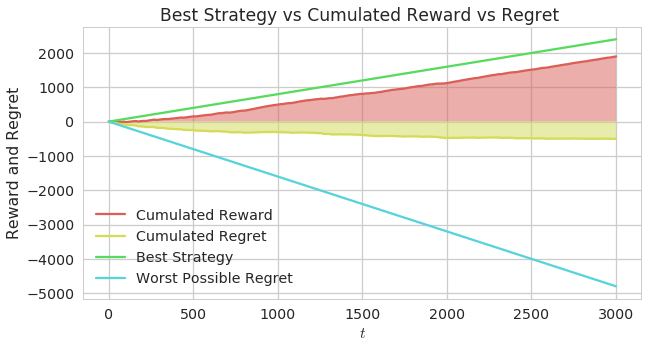

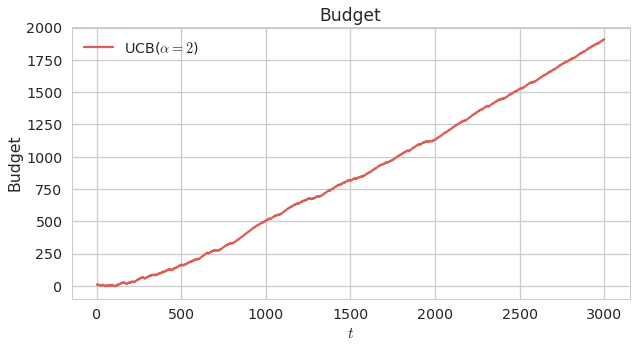

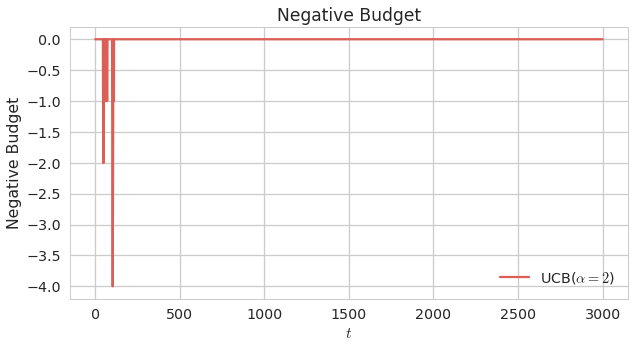

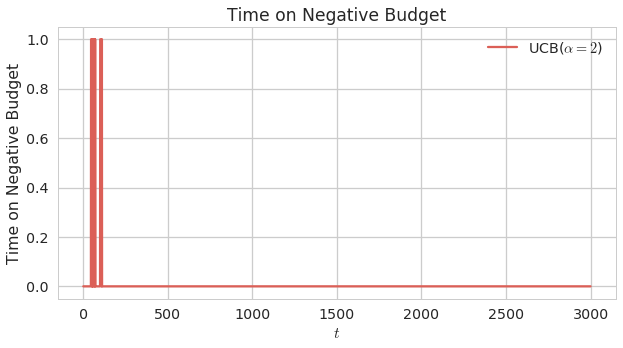

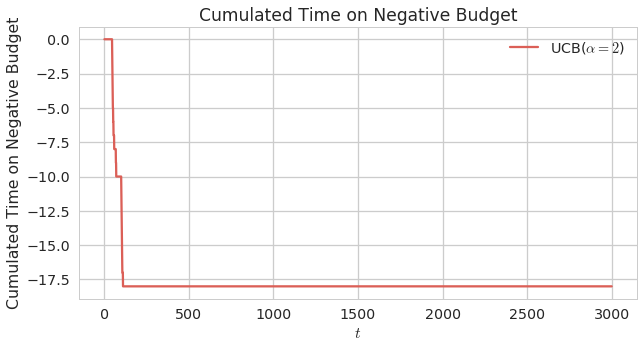

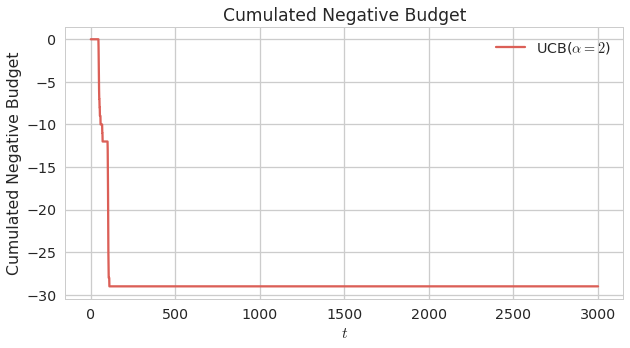

In [20]:
g = SafeUCBalpha(k, alpha=1.0*ampl, inibudget=10.0, safebudget=2.0, lower=-1.0, amplitude=2.0)

M = mabs(A, g, tau, repetitions=n, window=win)
M.run(tqdm_leave=True)

plotmab(M)